# Titanic - Data Exploration


In [222]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set default style
sns.set_style("whitegrid")

In [223]:
# Load datasets
test_dataset = pd.read_csv("test.csv")
train_dataset = pd.read_csv("train.csv")

## Check for missing data

In [224]:
# Inspect dataset
print(train_dataset.info())
print(train_dataset.describe().transpose())
train_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There are missing values in:

* Age (177)
* Cabin (687)
* Embarked (2)

Since PassengerId is just another index, it is omitted.

In [225]:
# Drop passenger ID
train_dataset.drop("PassengerId", axis=1, inplace=True)

## Check the distribution of features

**Distribution of numerically encoded features**

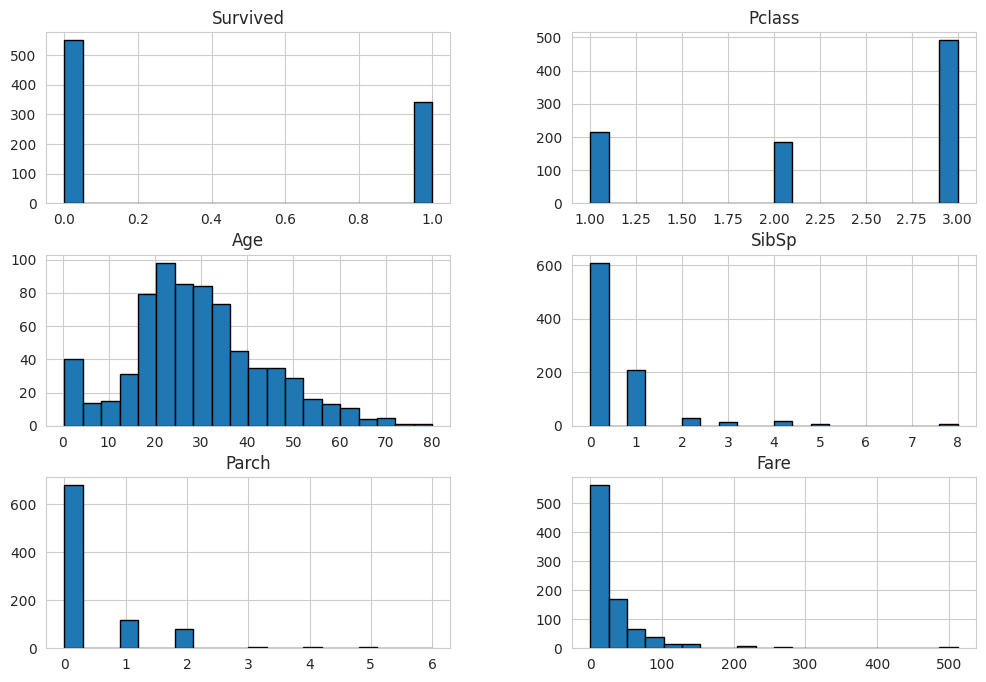

In [226]:
# Check distributions of numerically encoded features
train_dataset.hist(bins=20, figsize=(12, 8), edgecolor="k")
plt.show()

In [227]:
# Calculate total_survival_rate
non_survivors = len(train_dataset[train_dataset["Survived"] == 1])
total_passengers = len(train_dataset)
total_survival_rate = 100 * non_survivors / total_passengers
print(f"Total survival rate: {total_survival_rate:.1f}%")

# Calculate ratio of passengers in class 3
class_3_passengers = len(train_dataset[train_dataset["Pclass"] == 3])
class_3_ratio = 100 * class_3_passengers / total_passengers
print(f"Class 3 ratio: {class_3_ratio:.1f}%")

# Calculate ratio of passengers in class 2
class_2_passengers = len(train_dataset[train_dataset["Pclass"] == 2])
class_2_ratio = 100 * class_2_passengers / total_passengers
print(f"Class 2 ratio: {class_2_ratio:.1f}%")

# Calculate ratio of passengers in class 1
class_1_passengers = len(train_dataset[train_dataset["Pclass"] == 1])
class_1_ratio = 100 * class_1_passengers / total_passengers
print(f"Class 1 ratio: {class_1_ratio:.1f}%")

Total survival rate: 38.4%
Class 3 ratio: 55.1%
Class 2 ratio: 20.7%
Class 1 ratio: 24.2%


**Distribution of features Sex and Embarked**

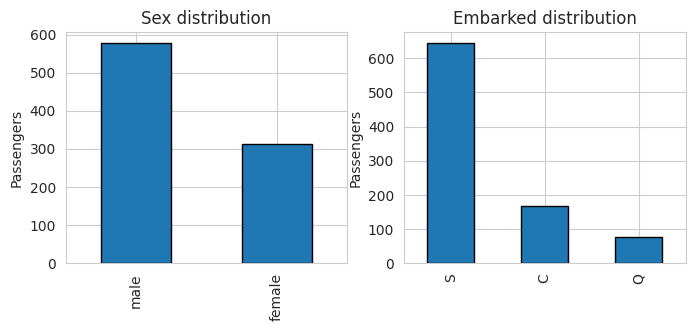

In [208]:
# Check distribution of categorical features sex, embarked
cat_features = ["Sex", "Embarked"]
fix, axes = plt.subplots(1, 2, figsize=(8,3))

for i in range(2):
    train_dataset[cat_features[i]].value_counts().plot(kind="bar", ax=axes[i],
                                                       edgecolor="k")
    axes[i].set_ylabel("Passengers")

axes[0].set_title("Sex distribution")
axes[1].set_title("Embarked distribution")
plt.show()

In [209]:
# Calculate ratio of gender
count_men = len(train_dataset[train_dataset["Sex"] == "male"])
ratio_men = 100 * count_men / total_passengers
print(f"Ratio men to women: {ratio_men:.1f}%")
print(f"Ratio women to men: {100 - ratio_men:.1f}% \n")

# Calculate ratio of people according to port of embarkation
count_southampton = len(train_dataset[train_dataset["Embarked"] == "S"])
ratio_southampton = 100 * count_southampton / total_passengers
print(f"Ratio people embarked in Southampton: {ratio_southampton:.1f}%")

count_cherbourg = len(train_dataset[train_dataset["Embarked"] == "C"])
ratio_cherbourg = 100 * count_cherbourg / total_passengers
print(f"Ratio people embarked in Cherbourg: {ratio_cherbourg:.1f}%")

count_queenstown = len(train_dataset[train_dataset["Embarked"] == "Q"])
ratio_queenstown = 100 * count_queenstown / total_passengers
print(f"Ratio people embarked in Queenstown: {ratio_queenstown:.1f}%")

Ratio men to women: 64.8%
Ratio women to men: 35.2% 

Ratio people embarked in Southampton: 72.3%
Ratio people embarked in Cherbourg: 18.9%
Ratio people embarked in Queenstown: 8.6%


According to [Wikipedia](https://en.wikipedia.org/wiki/Titanic#Dimensions_and_layout), there were the decks A (first class) to G.

Is the deck encoded in the cabin name?

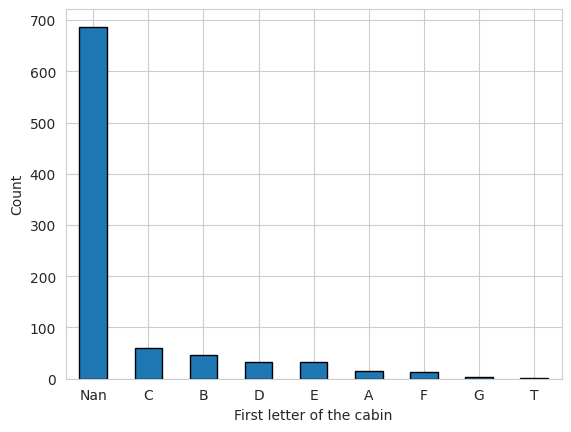

In [210]:
# Split cabin names into first letter or N for nan
cabin_decks = []
for i in range(891):
    deck = train_dataset["Cabin"][i]
    if pd.isna(deck):
        cabin_decks.append("N")
    else:
        cabin_decks.append(deck[0])

# Plot distribution of presumed decks
ax = pd.DataFrame(cabin_decks).value_counts().plot(kind="bar", edgecolor="k")
ax.set_xticklabels(labels=["Nan", "C", "B", "D", "E", "A", "F", "G", "T"],
                   rotation=0)
plt.ylabel("Count")
plt.xlabel("First letter of the cabin")
plt.show()

In [211]:
# Check for cabin entries starting with T
train_dataset[train_dataset["Cabin"].str.contains("t", case=False, na=False)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


T should not occur. However, there is only one entry with a cabin starting with T (Blackwell, Mr. Stephen Weart), so it may simply be mislabeled. Nevertheless, most of the cabins are missing from the record.

Has the ticket naming a pattern?

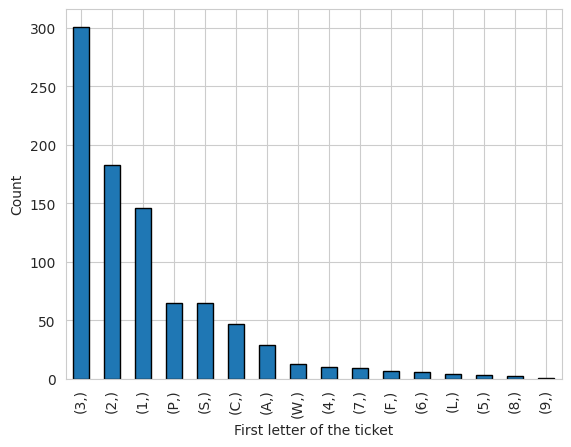

In [212]:
# Split cabin names into first letter or N for nan
ticket_decks = []
for i in range(891):
    deck = train_dataset["Ticket"][i]
    if pd.isna(deck):
        ticket_decks.append("N")
    else:
        ticket_decks.append(deck[0])

# Plot distribution of presumed decks
ax = pd.DataFrame(ticket_decks).value_counts().plot(kind="bar", edgecolor="k")
plt.ylabel("Count")
plt.xlabel("First letter of the ticket")
plt.show()

### Conclusions feature distribution:

Literally every feature is unbalanced:

1. PassengerID is equal to index
2. The majority of people did not survive. The overall survival rate is **38.4 %**.
3. The majority of passengers (**55.1%**) were in class 3, which was the cheapest.
4. The majority of passengers were male (**64.8%**)
5. Age appears to be somewhat normally distributed, but a significant number of values are missing (177)
6. SibSp (= siblings and spouses) is heavily skewed towards people who were alone on the ship.
7. Parch (=parents or children) is heavily skewed toward people who were alone on the ship.
8. Ticket name shows no clear pattern
9. Fare is left-skewed with a mean = 32 and a median = 14 (see class distribution)
10. The cabin name probably corresponds to the deck, but is not very useful for further analysis since the majority of entries are labeled with NaN
11. Majority of passengers with **72.3%** embarked in S (=Southampton)



## Relationships between features and feature engineering

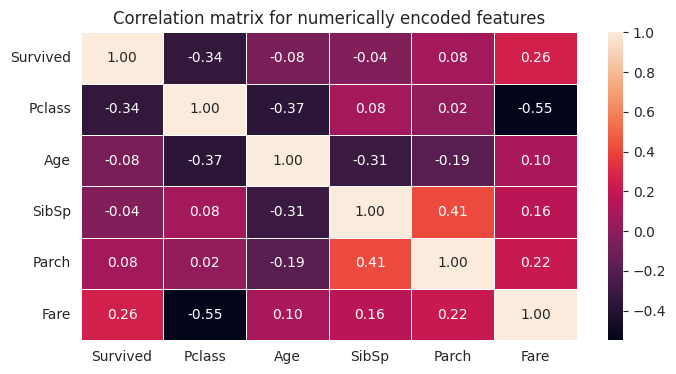

In [213]:
# Check correlation matrix
fig, axes = plt.subplots(figsize=(8,4))
sns.heatmap(train_dataset.corr(numeric_only=True),
            annot=True,
            cbar=True,
            linewidth=0.5,
            fmt=".2f",
            ax=axes)
plt.title("Correlation matrix for numerically encoded features")
plt.show()

Survival is highly correlated with fare paid and passenger class, and to a lesser extent with age of parents/children and siblings/spouses.

Passenger class correlates strongly with age and fare, indicating that the higher classes tend to be occupied by older people with more disposable income.

The number of parents/children and siblings/spouses are also correlated with each other and, together with the distribution of these characteristics, indicate that there were mostly single passengers on board and few families.

### Concatenate the number of relatives in a column

<br>

Based on the latter observation, it makes sense to combine the columns with the number of parents/children and siblings/spouses into relatives.

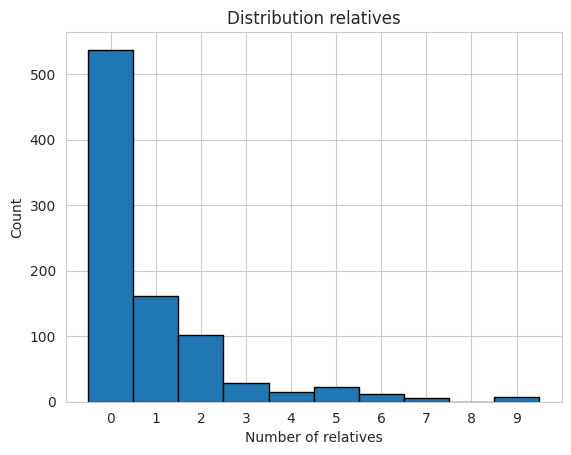

In [214]:
# Combine Parch and SibSp into relatives
train_dataset["Relatives"] = train_dataset["Parch"] + train_dataset["SibSp"]
train_dataset["Relatives"].hist(bins=10, edgecolor="k", align="left")
plt.title("Distribution relatives")
plt.xlabel("Number of relatives")
plt.xticks(list(range(10)))
plt.ylabel("Count")
plt.show()

### What are the survival rates for different categorical features?

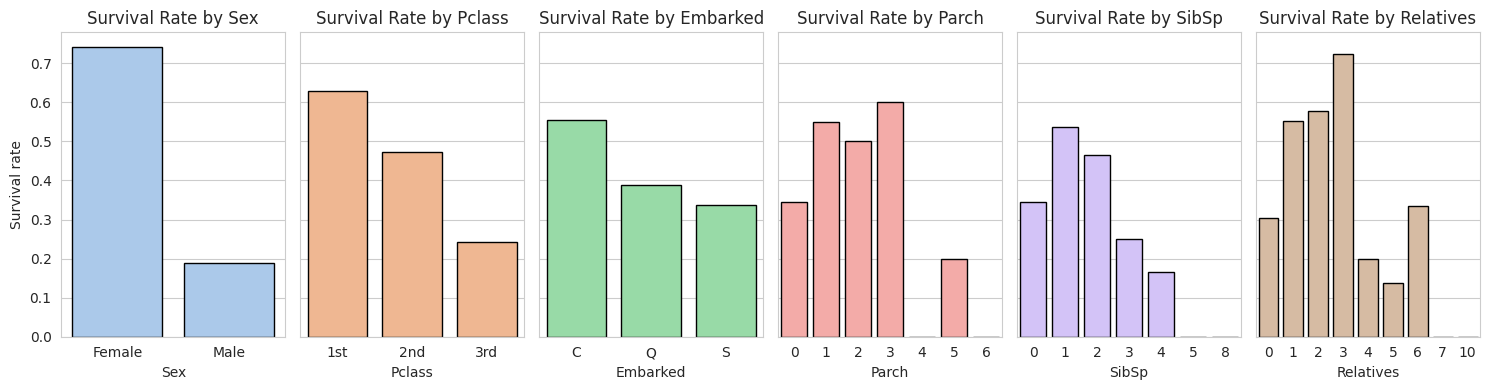

In [215]:
# Calculate survival rates by categories
categories = ["Sex", "Pclass", "Embarked", "Parch", "SibSp", "Relatives"]
survival_rates = [train_dataset.groupby(category)["Survived"].agg("mean") for category in categories]

# Create subplots
fig, axes = plt.subplots(1, 6, figsize=(15, 4), sharey=True, layout="tight")

# Define a color palette
palette = sns.color_palette("pastel", len(categories))

# Plot survival rates for each category
for i, (category, survival_rate) in enumerate(zip(categories, survival_rates)):
    sns.barplot(x=survival_rate.index,
                y=survival_rate.values,
                ax=axes[i],
                palette=[palette[i]],
                edgecolor="k")

    axes[i].set_title(f"Survival Rate by {category}", fontsize=12)
    axes[i].set_xlabel(category, fontsize=10)
axes[0].set_ylabel("Survival rate")
axes[0].set_xticklabels(["Female", "Male"])
axes[1].set_xticklabels(["1st", "2nd", "3rd"])
plt.show()

### Discretize the relatives column into 3 bins according to survival rate

<br>

It might be useful for the model to have relatives as a categorical variable, since the survival rate first increases (from being alone to having at least one relative) and then drops off abruptly with 3 or more relatives.

Therefore, a new column "Relatives_cat" is introduced, assigning each passenger one of 3 categories based on their relatives (0, 1-3, more than 3) and labeled with strings for now.

In [216]:
# Seperate relatives into 3 categories: alone, 1-3, >3
# Define the bin edges and labels
bin_edges = [-1, 0, 3, float("inf")]
bin_labels = ["0 relatives", "1-3 relatives", ">3 relatives"]

# Create the new categorical column
train_dataset["Relative_cat"] = pd.cut(train_dataset["Relatives"], bins=bin_edges, labels=bin_labels)
train_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Relative_cat
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1-3 relatives
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1-3 relatives
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0 relatives
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1-3 relatives
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0 relatives


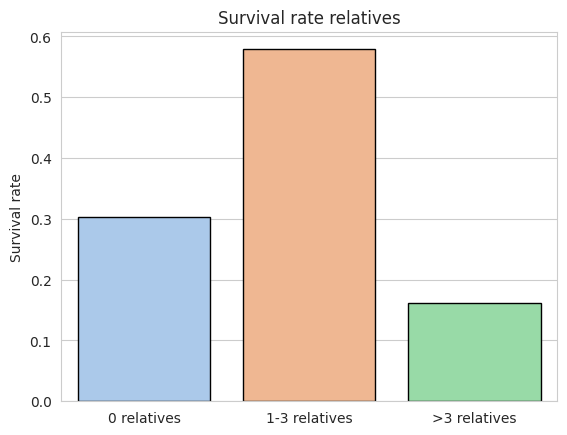

In [217]:
# Check survival rate for relative_cat
survival_rate_relative_cat = train_dataset.groupby("Relative_cat")["Survived"].agg("mean")

# Plot grouped data
sns.barplot(x=survival_rate_relative_cat.index,
            y=survival_rate_relative_cat.values,
            edgecolor="k",
            palette="pastel")
plt.title("Survival rate relatives")
plt.ylabel("Survival rate")
plt.xlabel(None)
plt.show()

### Why is the port of embarkation important to survival?

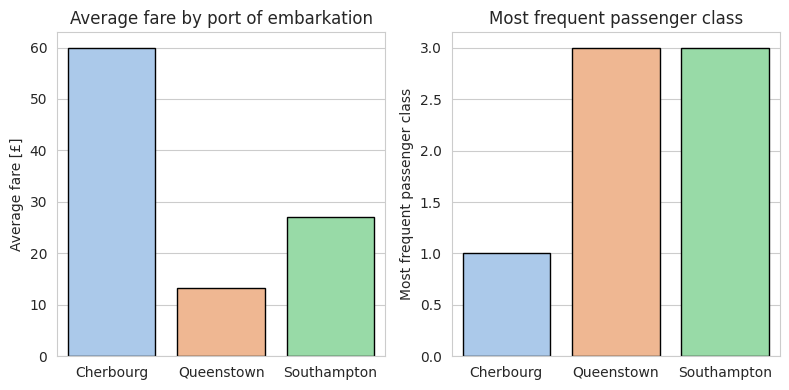

In [218]:
# Calculate the mean fare paid grouped by classes of Embarked
mean_fare_by_embarked = train_dataset.groupby("Embarked")["Fare"].agg("mean")

# Calculate the mean pclass  grouped by classes of Embarked
mean_pclass_by_embarked = train_dataset.groupby("Embarked")["Pclass"].agg(lambda x: x.mode().iloc[0])

# Plot grouped data
fix, axes = plt.subplots(1, 2, layout="tight", figsize=(8,4))

sns.barplot(x=mean_fare_by_embarked.index,
            y=mean_fare_by_embarked.values,
            edgecolor="k",
            palette="pastel",
            ax=axes[0])
axes[0].set_title("Average fare by port of embarkation")
axes[0].set_ylabel("Average fare [£]")
axes[0].set_xlabel(None)
axes[0].set_xticklabels(["Cherbourg", "Queenstown", "Southampton"])

sns.barplot(x=mean_pclass_by_embarked.index,
            y=mean_pclass_by_embarked.values,
            edgecolor="k",
            palette="pastel",
            ax=axes[1])
axes[1].set_title("Most frequent passenger class")
axes[1].set_ylabel("Most frequent passenger class")
axes[1].set_xlabel(None)
axes[1].set_xticklabels(["Cherbourg", "Queenstown", "Southampton"])
plt.show()

People from Cherbourg seem to have a higher budget for tickets and most of them stayed in first class. So the higher survival rate is a side effect of the above effects.

# What is the relationship between age and survival?

In [219]:
# Seperate age into bins of 5 years
# Define the bin edges and labels
bin_edges = np.arange(0, 70, 5)
bin_labels = ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35",
              "35-40", "40-45", "45-50", "50-55", "55-60", "60-65"]

# Create the new categorical column
train_dataset["age_cat"] = pd.cut(train_dataset["Age"],
                                  bins=bin_edges,
                                  labels=bin_labels)
train_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Relative_cat,age_cat
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1-3 relatives,20-25
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1-3 relatives,35-40
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0 relatives,25-30
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1-3 relatives,30-35
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0 relatives,30-35


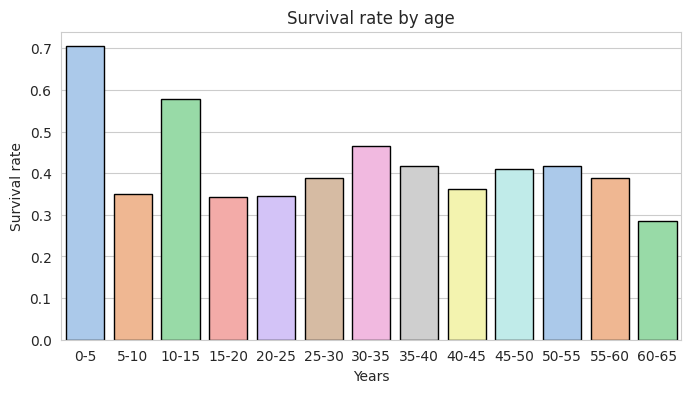

In [220]:
# Calculate survival rate for different age categories
survival_rate_age_cat = train_dataset.groupby("age_cat")["Survived"].agg("mean")

# Plot grouped data
fig, axes = plt.subplots(figsize=(8,4))
sns.barplot(x=survival_rate_age_cat.index,
            y=survival_rate_age_cat.values,
            edgecolor="k",
            palette="pastel",
            ax=axes)
plt.title("Survival rate by age")
plt.ylabel("Survival rate")
plt.xlabel("Years")
plt.show()

**Why do passengers between the ages of 10 and 15 have a higher survival rate?**

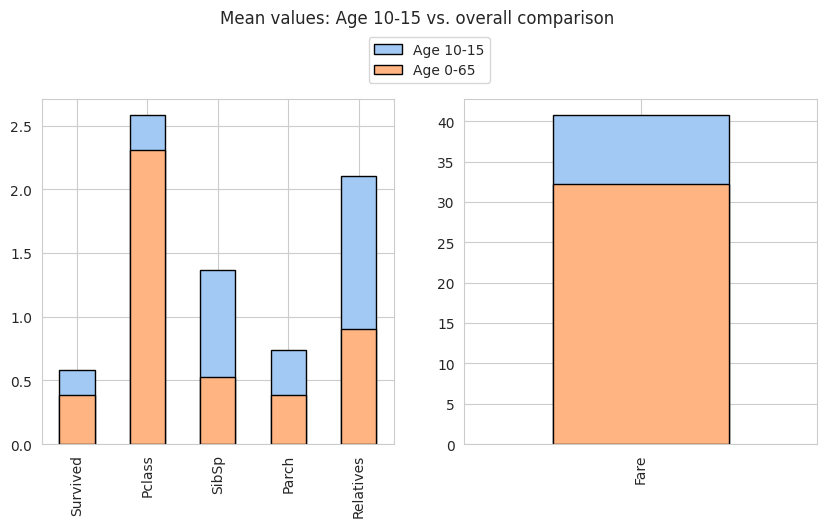

In [221]:
# Plot the mean values of features for the age category of 10-15
# and for the entire dataset to compare them
fig, axes = plt.subplots(1,2, figsize=(10,5))

# Filter dataset for category 10-15 years
filtered_df = train_dataset[train_dataset["age_cat"] == "10-15"]

# Plot Survived, Pclass, SibSp, Parch, Relatives in one plot
filtered_df.drop(["Age", "Fare"], axis=1).describe().transpose()["mean"].plot(
    kind="bar",
    edgecolor="k",
    color=palette[0],
    label="Age 10-15",
    ax=axes[0])
train_dataset.drop(["Age", "Fare"], axis=1).describe().transpose()["mean"].plot(
    kind="bar",
    edgecolor="k",
    color=palette[1],
    label="Age 0-65",
    ax=axes[0])

# Plot fare in another plot
filtered_df[["Fare"]].describe().transpose()["mean"].plot(
    kind="bar",
    edgecolor="k",
    color=palette[0],
    label="Age 10-15",
    ax=axes[1])
train_dataset[["Fare"]].describe().transpose()["mean"].plot(
    kind="bar",
    edgecolor="k",
    color=palette[1],
    label="Age 0-65",
    ax=axes[1])

plt.suptitle("Mean values: Age 10-15 vs. overall comparison")
plt.subplots_adjust(top=0.8)
axes[0].legend(loc="upper center", bbox_to_anchor=(1.1, 1.2))
plt.show()

## Conclusions feature relationship:
    
* Survival rates on the Titanic were strongly associated with fare paid and passenger class and to some degree to age and number of relatives on board
* Females had a substantially higher survival rate (74.2%) than males (18.9%), while the majority of passengers were male (64.8%).
* Survival rates were influenced by passenger class:
  * Third-class passengers had the lowest rate (24.2%).
  * Second-class passengers had an intermediate rate (47.3%).
  * First-class passengers had the highest rate (63.0%).
* The port of embarkation also affected survival rates:
  * Cherbourg had the highest rate (55.4%).
  * Queenstown and Southampton had lower rates (39.0% and 33.7%, respectively).
  * Passengers from Cherbourg paid higher fares and mostly traveled in first-class.
* Survival rates were influenced by the number of relatives on board:
  * Traveling alone resulted in a lower rate (30.4%).
  * Traveling with up to three relatives led to a higher rate (57.9%).
  * Traveling with more than three relatives resulted in a lower rate (16.1%).
* Passengers aged 0-5 were much more likely to survive (70.5%) compared to the overall average (38.4%).


